IM02 Online Section Group Notebook

Business Objective: Which team would be the best to invest in for the upcoming season?

Q1: Which teams have most consistently had the highest scores?

In [2]:
import pandas as pd
import sqlite3

#using entire database
con = sqlite3.connect("data/nba.sqlite")
games = pd.read_sql_query("SELECT * FROM game", con)
active_players = pd.read_sql_query("SELECT full_name FROM player WHERE is_active=TRUE", con)


# games data excluding all-star games (2019-2023)

games_recent_5yrs = pd.read_sql_query("""
	SELECT * FROM game 
	WHERE season_type NOT IN ('All Star', 'All-Star') 
	AND game_date BETWEEN '2019-01-01 00:00:00' AND '2023-12-31 23:59:59'
    ORDER BY game_date DESC 
""", con)

print(games_recent_5yrs.head(5))

  season_id team_id_home team_abbreviation_home  team_name_home     game_id  \
0     42022   1610612743                    DEN  Denver Nuggets  0042200405   
1     42022   1610612748                    MIA      Miami Heat  0042200404   
2     42022   1610612748                    MIA      Miami Heat  0042200403   
3     42022   1610612743                    DEN  Denver Nuggets  0042200402   
4     42022   1610612743                    DEN  Denver Nuggets  0042200401   

             game_date matchup_home wl_home  min  fgm_home  ...  reb_away  \
0  2023-06-12 00:00:00  DEN vs. MIA       W  240      38.0  ...      44.0   
1  2023-06-09 00:00:00  MIA vs. DEN       L  240      35.0  ...      34.0   
2  2023-06-07 00:00:00  MIA vs. DEN       L  240      34.0  ...      58.0   
3  2023-06-04 00:00:00  DEN vs. MIA       L  240      39.0  ...      31.0   
4  2023-06-01 00:00:00  DEN vs. MIA       W  240      40.0  ...      43.0   

   ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  

In [21]:
# mean, standard deviation of scores for each team
score_stats_home = games_recent_5yrs.groupby(['team_id_home','team_name_home'])['pts_home'].agg(['mean', 'std', 'count'])
score_stats_away = games_recent_5yrs.groupby(['team_id_away','team_name_away'])['pts_away'].agg(['mean', 'std', 'count'])

score_stats_home.index.names = ['team_id', 'team_name']
score_stats_away.index.names = ['team_id', 'team_name']

combined_stats = pd.concat([score_stats_home, score_stats_away])
score_stats_all = combined_stats.groupby(['team_id', 'team_name']).mean()
score_stats_all['total_games'] = combined_stats.groupby(['team_id', 'team_name'])['count'].sum()
score_stats_all = score_stats_all[score_stats_all['total_games'] >= 100]


# teams with highest average
print("Teams with highest average scores:")
print(score_stats_all.sort_values(by='mean', ascending=False).head(25))

Teams with highest average scores:
                                         mean        std  count  total_games
team_id    team_name                                                        
1610612749 Milwaukee Bucks         116.435716  12.726194  217.0          434
1610612762 Utah Jazz               114.124126  11.353901  196.5          393
1610612737 Atlanta Hawks           114.082051  12.425118  195.0          390
1610612750 Minnesota Timberwolves  114.046378  11.995903  184.0          368
1610612758 Sacramento Kings        113.760321  12.404773  186.5          373
1610612744 Golden State Warriors   113.553368  12.502250  207.5          415
1610612751 Brooklyn Nets           113.466575  12.269783  195.5          391
1610612740 New Orleans Pelicans    113.429579  11.357125  184.5          369
1610612763 Memphis Grizzlies       113.219401  12.564816  196.5          393
1610612756 Phoenix Suns            113.174049  11.591735  205.5          411
1610612743 Denver Nuggets          112.98

In [5]:
# teams with consistent scoring
print("Most consistent scoring teams (lowest standard deviation):")
print(score_stats_all.sort_values(by='std').head(25))

Most consistent scoring teams (lowest standard deviation):
                                         mean        std  count  total_games
team_id    team_name                                                        
1610612762 Utah Jazz               114.124126  11.353901  196.5          393
1610612739 Cleveland Cavaliers     107.244895  11.354891  182.0          364
1610612740 New Orleans Pelicans    113.429579  11.357125  184.5          369
1610612756 Phoenix Suns            113.174049  11.591735  205.5          411
1610612748 Miami Heat              108.997146  11.596273  217.5          435
1610612761 Toronto Raptors         111.561036  11.654833  203.0          406
1610612743 Denver Nuggets          112.986301  11.774490  219.0          438
1610612753 Orlando Magic           107.049138  11.822853  189.0          378
1610612750 Minnesota Timberwolves  114.046378  11.995903  184.0          368
1610612765 Detroit Pistons         106.855801  11.997323  183.0          366
1610612747 Los An

In [302]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Introduction
A "good" game isn't just about who wins. However, when it comes to which team to bet our money on, their points certainly matter. In evaluating teams for investment potential, scoring ability has traditionally been a key metric. With NBA scoring increasing in recent seasons, investors need to look deeper than just offensive output. Is a high-scoring offense truly indicative of a team's value and future success? To identify the most promising investment opportunities for the upcoming season, we analyzed scoring patterns from 2019-2023, examining not just point totals but offensive consistency. This comprehensive analysis aims to uncover teams that demonstrate sustainable excellence.


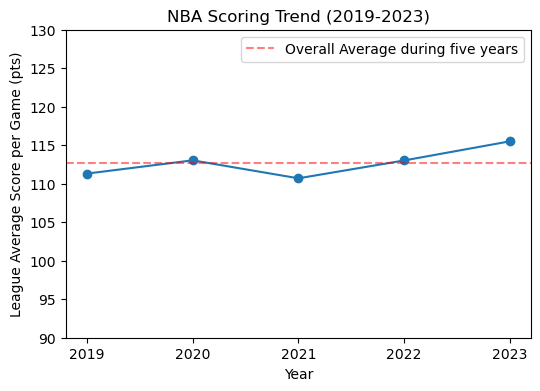

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
regular_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Regular Season']
games_recent_5yrs['game_year'] = pd.to_datetime(games_recent_5yrs['game_date']).dt.year
plt.figure(figsize=(6,4))
yearly_avg = regular_games.groupby('game_year').agg({
    'pts_home' : 'mean', 'pts_away' : 'mean'}).reset_index()
yearly_avg['points'] = (yearly_avg['pts_home'] + yearly_avg['pts_away'])/2
yearly_avg['game_year'] = yearly_avg['game_year'].astype(int)
plt.plot(yearly_avg['game_year'], yearly_avg['points'], marker='o')
plt.axhline(y=yearly_avg['points'].mean(), color='r', linestyle='--', alpha=0.5, label='Overall Average during five years')
plt.xticks(yearly_avg['game_year'])
plt.ylim(90,130)
plt.title('NBA Scoring Trend (2019-2023)')
plt.xlabel('Year')
plt.ylabel('League Average Score per Game (pts)')
plt.legend()
plt.show()


Rising Action
Initial market analysis might attract investors to the Milwaukee Bucks, who lead with an average of 116.44 points per game. However, high performance must be sustainable to ensure reliable returns. Our analysis shows that the top 10 teams all average over 113 points, indicating intense competition and multiple investment opportunities. The key question now is “Which team's offensive success is most sustainable?"

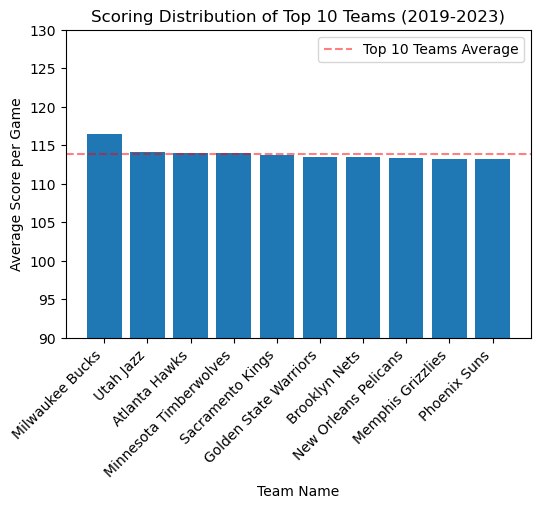

In [9]:
# visualization for Rising action - Top 10 teams scoring
top10_teams_scoring = score_stats_all.reset_index().sort_values(by='mean', ascending=False).head(10)
plt.figure(figsize=(6,4))
plt.bar(top10_teams_scoring['team_name'], top10_teams_scoring['mean'])
plt.xticks(rotation=45, ha='right')
plt.title('Scoring Distribution of Top 10 Teams (2019-2023)')
plt.xlabel('Team Name')
plt.ylabel('Average Score per Game')
plt.ylim(90, 130)

# average line
top10_avg = top10_teams_scoring['mean'].mean()
plt.axhline(y=top10_avg, color='r', linestyle='--', alpha=0.5, label='Top 10 Teams Average')
plt.legend()
plt.show()


Climax
The most meaningful insight came when we examined scoring consistency. While the Milwaukee Bucks led in scoring power, the Utah Jazz stood out in offensive efficiency, maintaining a high scoring average (114.12 points) with the league's lowest standard deviation (11.35). This remarkable consistency, coupled with their scoring volume, suggests an optimal balance of return and risk.
Additionally, teams like the New Orleans Pelicans, Phoenix Suns, and Denver Nuggets demonstrated exceptional consistency across over 400 games, despite not leading in raw scoring numbers. This highlights that offensive stability might be just as valuable as scoring power.


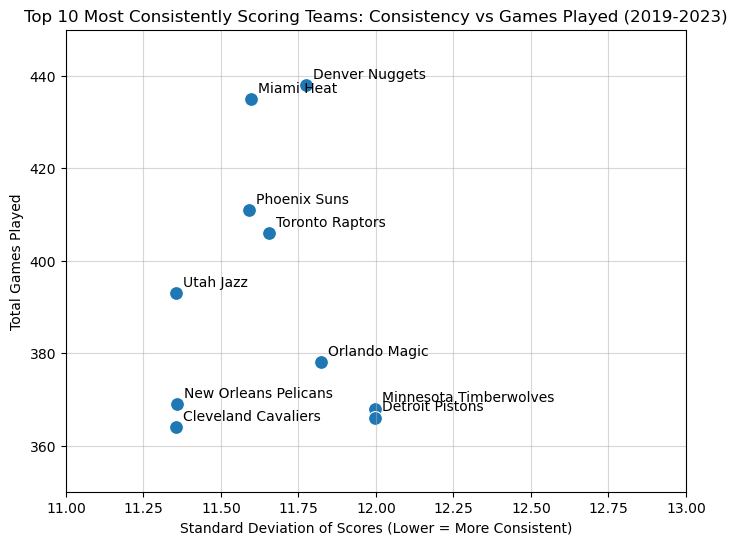

In [10]:
# visualization for Climax - Top 10 teams consistency (games played)
top10_teams_consistent = score_stats_all.reset_index().sort_values(by='std', ascending=True).head(10)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top10_teams_consistent, 
                x='std', y='total_games', s=100)
# team name label 
for i in range(len(top10_teams_consistent)):
    plt.annotate(top10_teams_consistent['team_name'].iloc[i], 
                (top10_teams_consistent['std'].iloc[i], 
                 top10_teams_consistent['total_games'].iloc[i]),
                xytext=(5, 5), textcoords='offset points')
plt.xlim(11,13)
plt.ylim(350,450)
plt.title('Top 10 Most Consistently Scoring Teams: Consistency vs Games Played (2019-2023)')
plt.xlabel('Standard Deviation of Scores (Lower = More Consistent)')
plt.ylabel('Total Games Played')
plt.grid(True, alpha=0.5)
plt.show()


Falling Action
This discovery showed us that being the best isn't just about scoring the most points. It's about being able to perform well game after game. While teams with higher scoring averages might attract immediate attention, the Utah Jazz's combination of strong scoring and consistency supports long-term value appreciation. 


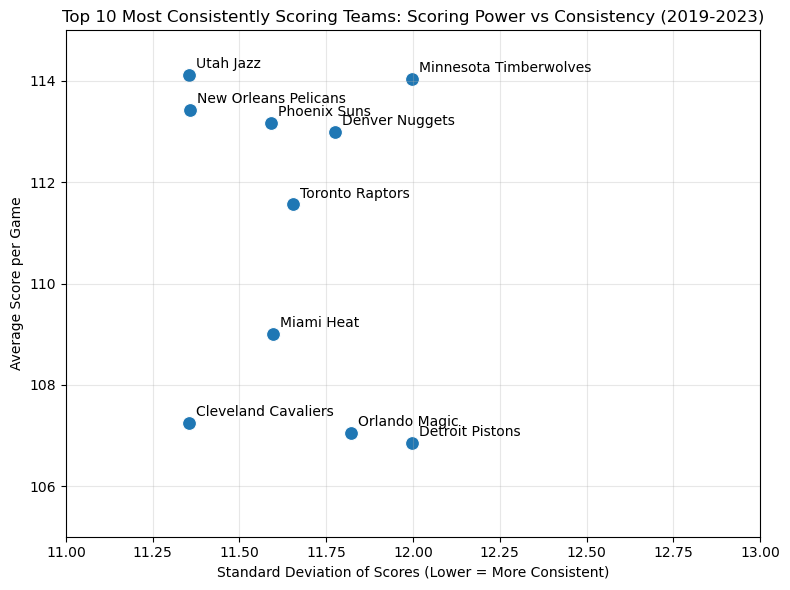

In [16]:
# visualization for Falling action - Top 10 teams consistency (scoring power)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top10_teams_consistent, 
                x='std', y='mean', s=100)
# team name labels
for i in range(len(top10_teams_consistent)):
    plt.annotate(top10_teams_consistent['team_name'].iloc[i], 
                (top10_teams_consistent['std'].iloc[i], 
                 top10_teams_consistent['mean'].iloc[i]),
                xytext=(5, 5), textcoords='offset points')
plt.xlim(11,13)
plt.ylim(105,115)
plt.title('Top 10 Most Consistently Scoring Teams: Scoring Power vs Consistency (2019-2023)')
plt.xlabel('Standard Deviation of Scores (Lower = More Consistent)')
plt.ylabel('Average Score per Game')
plt.grid(True, alpha=0.3)
plt.tight_layout()


Resolution
Our analysis suggests three investment opportunities – chosen due to their average points being over 114 per game, with a standard deviation under 12.:
1. Premium Investment (Utah Jazz): Balance of high scoring and consistency, suggesting strong fundamentals and reliable returns
2. Value Opportunities (New Orleans Pelicans, Phoenix Suns, Denver Nuggets): Strong consistency metrics suggest possible market undervaluation
3. Growth Potential (Minnesota Timberwolves): Higher scoring but more variable The Utah Jazz’s combination of offensive excellence and consistency makes them a particularly attractive investment option.

/var/folders/xv/493fyh3j3kld1fn5fw4qgvtw0000gq/T/ipykernel_4373/1129591678.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(resolution_data['team_name'], ha='right')
/var/folders/xv/493fyh3j3kld1fn5fw4qgvtw0000gq/T/ipykernel_4373/1129591678.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(resolution_data['team_name'], ha='right')


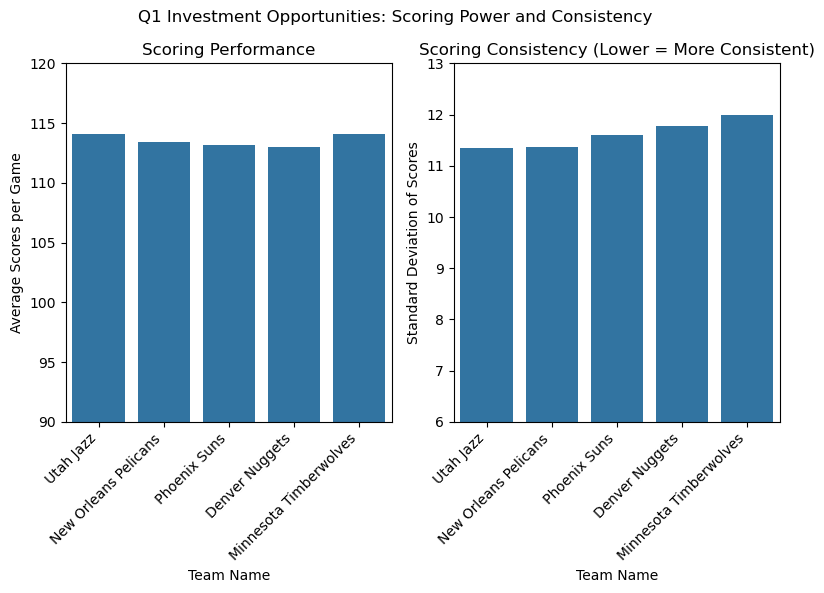

In [17]:
# visualization for resolution
teams_of_interest_q1 = ['Utah Jazz', 'New Orleans Pelicans', 'Phoenix Suns', 
                    'Denver Nuggets', 'Minnesota Timberwolves']
resolution_data = top10_teams_consistent[top10_teams_consistent['team_name'].isin(teams_of_interest_q1)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
# teams of interest - average scores 
sns.barplot(data=resolution_data, x='team_name', y='mean', ax=ax1)
ax1.set_title('Scoring Performance')
ax1.set_xlabel('Team Name')
ax1.set_ylabel('Average Scores per Game')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticklabels(resolution_data['team_name'], ha='right')
ax1.set_ylim(90, 120)
# teams of interest - sd of scores
sns.barplot(data=resolution_data, x='team_name', y='std', ax=ax2)
ax2.set_title('Scoring Consistency (Lower = More Consistent)')
ax2.set_xlabel('Team Name')
ax2.set_ylabel('Standard Deviation of Scores')
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticklabels(resolution_data['team_name'], ha='right')
ax2.set_ylim(6, 13)
plt.suptitle('Q1 Investment Opportunities: Scoring Power and Consistency')
plt.tight_layout()
plt.show()


Q2: Which team has had below average for the most consecutive seasons?


In [80]:
season_avg = pd.concat([games_recent_5yrs['pts_home'], games_recent_5yrs['pts_away']]).mean()

home_games = games_recent_5yrs[['season_id', 'team_id_home', 'team_name_home', 'pts_home', 'game_date']].rename(columns={
    'team_id_home': 'team_id',
    'team_name_home': 'team_name',
    'pts_home': 'points'
})
away_games = games_recent_5yrs[['season_id', 'team_id_away', 'team_name_away', 'pts_away', 'game_date']].rename(columns={
    'team_id_away': 'team_id',
    'team_name_away': 'team_name',
    'pts_away': 'points'
})
all_games = pd.concat([home_games, away_games])

# average points per team per season
team_season_avg = all_games.groupby(['season_id', 'team_id', 'team_name', 'game_date'])['points'].mean().reset_index()

# below average seasons
team_season_avg['league_avg'] = season_avg
team_season_avg['below_average'] = team_season_avg['points'] < team_season_avg['league_avg']
team_season_avg = team_season_avg.sort_values(['team_id', 'season_id'])
print(team_season_avg.head(10))
# average points per season
season_avg = pd.concat([games_recent_5yrs['pts_home'], games_recent_5yrs['pts_away']]).mean()

home_games = games_recent_5yrs[['season_id', 'team_id_home', 'team_name_home', 'pts_home']].rename(columns={
    'team_id_home': 'team_id',
    'team_name_home': 'team_name',
    'pts_home': 'points'
})
away_games = games_recent_5yrs[['season_id', 'team_id_away', 'team_name_away', 'pts_away']].rename(columns={
    'team_id_away': 'team_id',
    'team_name_away': 'team_name',
    'pts_away': 'points'
})
all_games = pd.concat([home_games, away_games])

# average points per team per season
team_season_avg = all_games.groupby(['season_id', 'team_id', 'team_name'])['points'].mean().reset_index()

# below average seasons
team_season_avg['league_avg'] = season_avg
team_season_avg['below_average'] = team_season_avg['points'] < team_season_avg['league_avg']
team_season_avg = team_season_avg.sort_values(['team_id', 'season_id'])
print(team_season_avg.head(10))


# consecutive streaks
def consecutive_streak(group):
   current_streak = 0
   max_streak = 0
   
   for below_avg in group:
       if below_avg:
           current_streak += 1
           max_streak = max(max_streak, current_streak)
       else:
           current_streak = 0
           
   return max_streak

team_streaks = team_season_avg.groupby('team_name')['below_average'].apply(consecutive_streak)
team_streaks = team_streaks.sort_values(ascending=False)

print("Teams with most consecutive below-average seasons:")
print(team_streaks.head(10))


team_streaks = team_streaks.sort_values(ascending=True)

print("Teams with least consecutive below-average seasons:")
print(team_streaks.head(10))


    season_id     team_id       team_name            game_date  points  \
230     12022       15019  Adelaide 36ers  2022-10-02 00:00:00   134.0   
231     12022       15019  Adelaide 36ers  2022-10-06 00:00:00    98.0   
0       12020  1610612737   Atlanta Hawks  2020-12-11 00:00:00   112.0   
1       12020  1610612737   Atlanta Hawks  2020-12-13 00:00:00   116.0   
2       12020  1610612737   Atlanta Hawks  2020-12-17 00:00:00   106.0   
3       12020  1610612737   Atlanta Hawks  2020-12-19 00:00:00   117.0   
98      12021  1610612737   Atlanta Hawks  2021-10-04 00:00:00    99.0   
99      12021  1610612737   Atlanta Hawks  2021-10-06 00:00:00    96.0   
100     12021  1610612737   Atlanta Hawks  2021-10-09 00:00:00    91.0   
101     12021  1610612737   Atlanta Hawks  2021-10-14 00:00:00   127.0   

     league_avg  below_average  
230  111.924325          False  
231  111.924325           True  
0    111.924325          False  
1    111.924325          False  
2    111.924325     

Introduction
NBA scoring ability is often viewed as a key indicator of team success. However, it's not unheard of for a team to score poorly at the start of the playing year and still move on to the playoffs. Taking a look at consecutive underperformance can give us a better understanding of a team’s overall scoring ability. Analyzing game-point patterns across all season types—preseason, regular season, and playoffs—from 2019 to 2023, we investigated which teams have consecutively struggled to keep up with the league's scoring average.

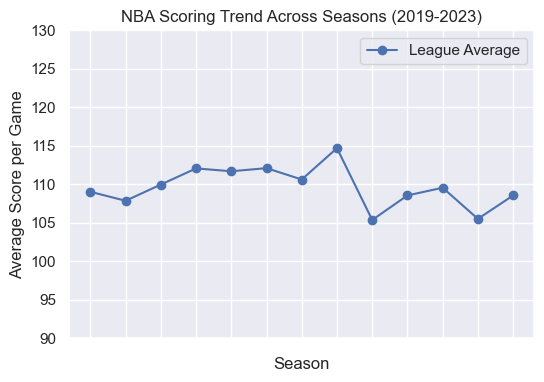

In [83]:
season_across_avg = team_season_avg.groupby('season_id')['points'].mean().reset_index()
plt.figure(figsize=(6,4))
plt.plot(season_across_avg['season_id'], season_across_avg['points'], label='League Average', marker='o')
plt.title('NBA Scoring Trend Across Seasons (2019-2023)')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.ylim(90,130)
plt.xlabel('Season')
plt.ylabel('Average Score per Game')
plt.legend()
plt.show()

Rising Action
Our analysis showed that a league's average scoring was 111.92 points per game, establishing a clear benchmark for team performance evaluation. Using this threshold, our goal was to see which teams have had the most consecutive seasons averaging a score below the league standard  – potentially indicating systematic issues that could affect their value.


Teams with highest average scores:
                                                   mean        std  count  \
team_id    team_name              game_year                                 
1610612758 Sacramento Kings       2023       121.351190  14.097170   27.5   
1610612737 Atlanta Hawks          2023       120.935556  10.581633   26.0   
1610612749 Milwaukee Bucks        2023       119.807692  14.019533   26.0   
1610612760 Oklahoma City Thunder  2023       119.475379  11.428609   23.0   
1610612744 Golden State Warriors  2023       119.241379  12.043391   29.0   
1610612749 Milwaukee Bucks        2019       118.377764  11.766527   48.5   
1610612750 Minnesota Timberwolves 2022       117.711762  12.590458   47.5   
1610612740 New Orleans Pelicans   2020       117.321429  11.167296   22.5   
1610612742 Dallas Mavericks       2020       117.234127  10.458553   27.5   
1610612754 Indiana Pacers         2023       117.063241  12.116996   22.5   

                                        

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Atlanta Hawks'),
  Text(1, 0, 'Boston Celtics'),
  Text(2, 0, 'Cleveland Cavaliers'),
  Text(3, 0, 'New Orleans Pelicans'),
  Text(4, 0, 'Chicago Bulls'),
  Text(5, 0, 'Dallas Mavericks'),
  Text(6, 0, 'Denver Nuggets'),
  Text(7, 0, 'Golden State Warriors'),
  Text(8, 0, 'Houston Rockets'),
  Text(9, 0, 'LA Clippers'),
  Text(10, 0, 'Los Angeles Lakers'),
  Text(11, 0, 'Miami Heat'),
  Text(12, 0, 'Milwaukee Bucks'),
  Text(13, 0, 'Minnesota Timberwolves'),
  Text(14, 0, 'Brooklyn Nets'),
  Text(15, 0, 'New York Knicks'),
  Text(16, 0, 'Orlando Magic'),
  Text(17, 0, 'Indiana Pacers'),
  Text(18, 0, 'Philadelphia 76ers'),
  Text(19, 0, 'Phoenix Suns'),
  Text(20, 0, 'Portland Trail Blazers'),
  Text(21, 0, 'Sacramento Kings'),
  Text(22, 0, 'San Antonio Spurs'),
  Text(23, 0, 'Oklahoma City Thunder'),
 

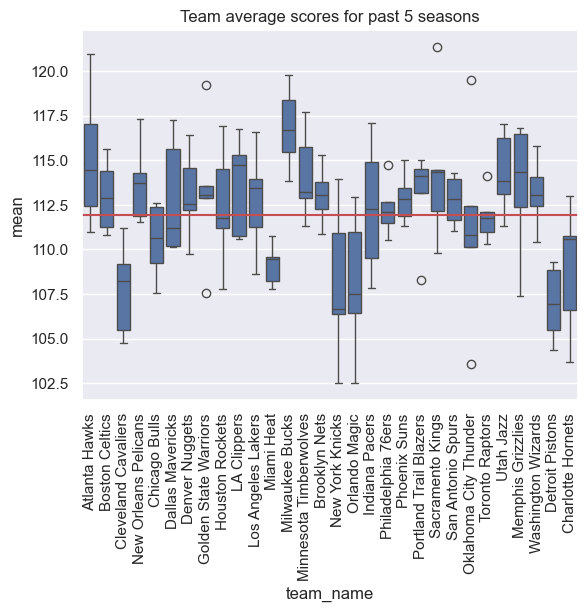

In [27]:
games_recent_5yrs['game_year'] = pd.to_datetime(games_recent_5yrs['game_date']).dt.year

score_stats_home = games_recent_5yrs.groupby(['team_id_home','team_name_home', 'game_year'])['pts_home'].agg(['mean', 'std', 'count'])
score_stats_away = games_recent_5yrs.groupby(['team_id_away','team_name_away', 'game_year'])['pts_away'].agg(['mean', 'std', 'count'])

score_stats_home.index.names = ['team_id', 'team_name', 'game_year']
score_stats_away.index.names = ['team_id', 'team_name', 'game_year']

combined_stats = pd.concat([score_stats_home, score_stats_away])
score_stats_all = combined_stats.groupby(['team_id', 'team_name','game_year']).mean()
score_stats_all['total_games'] = combined_stats.groupby(['team_id', 'team_name'])['count'].sum()
score_stats_all = score_stats_all[score_stats_all['total_games'] >= 100]

# teams with highest average
print("Teams with highest average scores:")
print(score_stats_all.sort_values(by='mean', ascending=False).head(10)) 

season_avg = pd.concat([games_recent_5yrs['pts_home'], games_recent_5yrs['pts_away']]).mean()

sns.set_theme()
sns.boxplot(data=score_stats_all, x="team_name", y="mean").set_title("Team average scores for past 5 seasons")
plt.axhline(y=season_avg, color='r', linestyle='-', label='Overall Average')
plt.xticks(rotation='vertical')


Climax
We discovered a striking contrast in scoring consistency across the NBA. The Orlando Magic and Detroit Pistons have notably struggled with scoring, each recording 9 consecutive seasons below the league average - a persistent challenge rather than a temporary slump. The Miami Heat and Cleveland Cavaliers followed with 7-season streaks, suggesting potential value opportunities if these playing challenges can be addressed. 

Meanwhile, teams like  Sacramento Kings, New Orleans Pelicans, and Golden State Warriors demonstrated remarkable offensive stability, rarely falling below the league average. This polarization suggests interesting investment implications: while struggling teams might offer value opportunities, consistently strong performers could represent safer, premium investments.

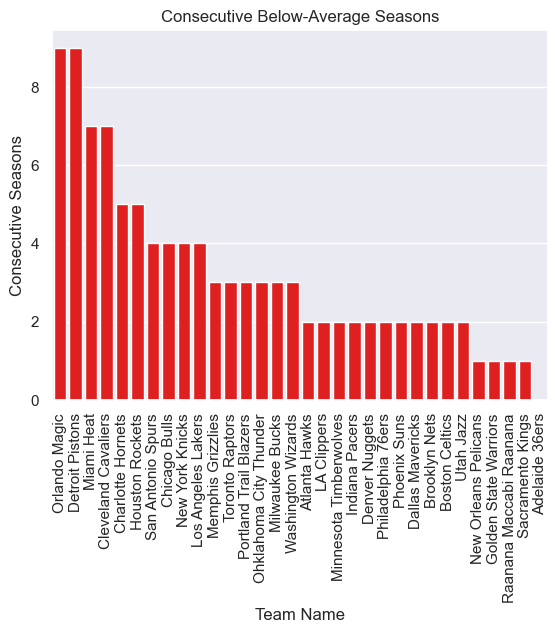

In [28]:
season_data = [['Orlando Magic', 9], ['Detroit Pistons', 9], ['Miami Heat', 7], ['Cleveland Cavaliers', 7], ['Charlotte Hornets', 5], ['Houston Rockets', 5], ['San Antonio Spurs', 4], ['Chicago Bulls', 4], ['New York Knicks', 4], ['Los Angeles Lakers', 4], ['Memphis Grizzlies', 3], ['Toronto Raptors', 3], ['Portland Trail Blazers', 3], ['Ohklahoma City Thunder', 3], ['Milwaukee Bucks', 3], ['Washington Wizards', 3], ['Atlanta Hawks', 2], ['LA Clippers', 2], ['Minnesota Timberwolves', 2], ['Indiana Pacers', 2], ['Denver Nuggets', 2], ['Philadelphia 76ers', 2], ['Phoenix Suns', 2], ['Dallas Mavericks', 2], ['Brooklyn Nets', 2], ['Boston Celtics', 2], ['Utah Jazz', 2], ['New Orleans Pelicans', 1], ['Golden State Warriors', 1], ['Raanana Maccabi Raanana', 1], ['Sacramento Kings', 1], ['Adelaide 36ers', 0]] 
consecutive_underperformance = pd.DataFrame(season_data, columns=['team_name', 'consecutive_seasons'])
ax= sns.barplot(x='team_name', y='consecutive_seasons', data=consecutive_underperformance, color='red')
ax.set_title('Consecutive Below-Average Seasons')
ax.set_ylabel('Consecutive Seasons')
ax.set_xlabel('Team Name')
plt.xticks(rotation=90)
plt.show()

Falling Action
There are many reasons a team can do poorly – from poor coaching, a poor player line-up, or insufficient financial support.  However, when we look for which teams had the least consecutive underperforming seasons, we can see that there are many teams that can turn it around within the 3 possible seasons types. This trend highlights a key market insight: a team's historical prestige or market size does not guarantee consistency in scoring capabilities, emphasizing that organization and player effectiveness is a critical factor in securing a game-win.

/var/folders/xv/493fyh3j3kld1fn5fw4qgvtw0000gq/T/ipykernel_4373/3007973714.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_teams['game_year_Q2'] = pd.to_datetime(selected_teams['game_date']).dt.year


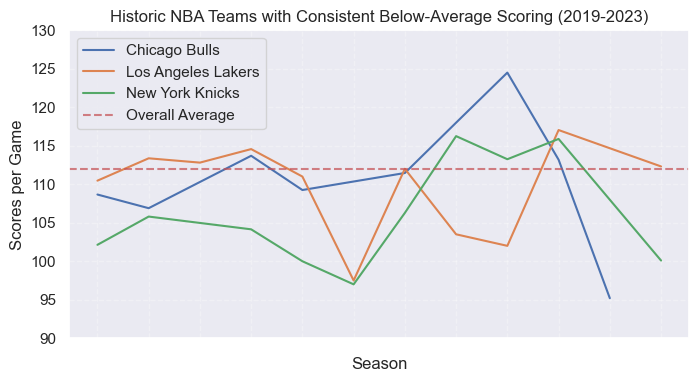

In [85]:
season_avg = pd.concat([games_recent_5yrs['pts_home'], games_recent_5yrs['pts_away']]).mean()

home_games = games_recent_5yrs[['season_id', 'team_id_home', 'team_name_home', 'pts_home', 'game_date']].rename(columns={
    'team_id_home': 'team_id',
    'team_name_home': 'team_name',
    'pts_home': 'points'
})
away_games = games_recent_5yrs[['season_id', 'team_id_away', 'team_name_away', 'pts_away', 'game_date']].rename(columns={
    'team_id_away': 'team_id',
    'team_name_away': 'team_name',
    'pts_away': 'points'
})
all_games = pd.concat([home_games, away_games])

team_season_avg = all_games.groupby(['season_id', 'team_id', 'team_name', 'game_date'])['points'].mean().reset_index()
selected_teams = team_season_avg[team_season_avg['team_name'].isin(['Chicago Bulls', 'New York Knicks', 'Los Angeles Lakers'])]
selected_teams['game_year_Q2'] = pd.to_datetime(selected_teams['game_date']).dt.year

yearly_avg_by_team = selected_teams.groupby(['game_year_Q2', 'season_id', 'team_name'])['points'].mean().reset_index()
yearly_avg_by_team = yearly_avg_by_team.sort_values('game_year_Q2')

plt.figure(figsize=(8, 4))
sns.lineplot(data=yearly_avg_by_team, x='season_id', y='points', hue='team_name', errorbar=None)

plt.axhline(y=season_avg, color='r', linestyle='--', label='Overall Average', alpha=0.7)
plt.ylim(90,130)

plt.title('Historic NBA Teams with Consistent Below-Average Scoring (2019-2023)')
plt.xlabel('Season')
plt.ylabel('Scores per Game')
plt.xticks(ticks=plt.xticks()[0], labels=[])

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.show()


Resolution
From an investment perspective, these struggling teams present contrasting opportunities.
1. Premium Investment (Sacramento Kings, Golden State Warriors, New Orleans Pelicans):
Consistently maintains above-average scoring performance
Offers lower risk with proven track record
2. High Risk/High Reward (Orlando Magic, Detroit Pistons, New York Knicks): 
Persistent below-average scoring performance
Significant turnaround potential if structural issues are addressed
Current valuations might reflect underperformance


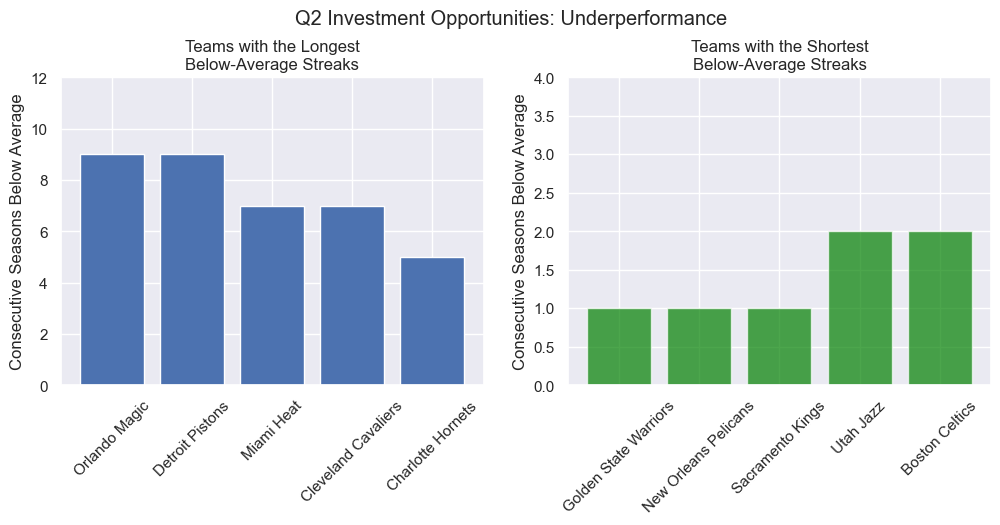

In [72]:
# visualization for resolution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# top 5 longest below average streaks
top5_longest = team_streaks.sort_values(ascending=False).head(5)
ax1.bar(top5_longest.index, top5_longest.values)
ax1.set_title('Teams with the Longest\nBelow-Average Streaks')
ax1.set_ylim(0, 12)
ax1.set_ylabel('Consecutive Seasons Below Average')
# top 5 shortest below average streaks
team_streaks_filtered = team_streaks.sort_values(ascending=True)
top5_shortest = team_streaks_filtered.iloc[2:].head(5)
ax2.bar(top5_shortest.index, top5_shortest.values, color='green', alpha=0.7)
ax2.set_title('Teams with the Shortest\nBelow-Average Streaks')
ax2.set_ylim(0, 4)
ax2.set_ylabel('Consecutive Seasons Below Average')
plt.sca(ax1)
plt.xticks(rotation=45)
plt.sca(ax2)
plt.xticks(rotation=45)
plt.suptitle('Q2 Investment Opportunities: Underperformance', y=1.05)
plt.show()

Q3: Which team has consistently made it to the playoffs?

In [34]:
# playoff games
playoff_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Playoffs']

# playoff appearances (seasons)
playoff_home_seasons = playoff_games[['season_id', 'team_name_home']].rename(
   columns={'team_name_home': 'team_name'}).drop_duplicates()
playoff_away_seasons = playoff_games[['season_id', 'team_name_away']].rename(
   columns={'team_name_away': 'team_name'}).drop_duplicates()
all_playoff_seasons = pd.concat([playoff_home_seasons, playoff_away_seasons]).drop_duplicates()
playoff_appearances = all_playoff_seasons.groupby('team_name').size().sort_values(ascending=False)

# total playoff games (games)
playoff_home_games = playoff_games[['team_name_home', 'game_id']].rename(
   columns={'team_name_home': 'team_name'})
playoff_away_games = playoff_games[['team_name_away', 'game_id']].rename(
   columns={'team_name_away': 'team_name'})
all_playoff_games = pd.concat([playoff_home_games, playoff_away_games])
playoff_games_count = all_playoff_games.groupby('team_name').size()
print(playoff_games_count.head(5)) # The print result shows the same number of games as you found on the website( Boston Celtics 75).

# playoff appearances, for both seasons & games
playoff_all = pd.DataFrame({
    'team_name': playoff_appearances.index,
    'seasons': playoff_appearances.values,
    'total_games': playoff_games_count[playoff_appearances.index].values
})  # This is the part that was a problem.  All the indexes got mixed up when I put these columns together when putting them into a dataframe. After resetting the index order of playoff_games_count as same as playoff_appearances and then incorporating them into a dataframe, python returned the same number of games as the website. 

print(playoff_all.head(5))

# average playoff game per season 
playoff_all['games_per_season'] = (playoff_all['total_games'] / playoff_all['seasons'])

# success rate
total_seasons = games_recent_5yrs['season_id'].nunique()
playoff_all['success_rate'] = (playoff_all['seasons'] / total_seasons * 100)

print("\nPlayoff appearances and games (2019-2023):")
print(playoff_all[['team_name', 'seasons', 'success_rate', 'total_games']].head(10))
# I attached the final result of the last print. 

#I’m not sure how to calculate an average success rate. As we had it, it was only considering how many times a team has gone to the playoffs, not how well they did in the playoffs. I changed to average games per playoff season but feel free to replace

# playoff appearance rate   
total_seasons = games_recent_5yrs['season_id'].nunique()
playoff_all['appearance_rate'] = (playoff_all['seasons'] / total_seasons * 100)

# playoff win percentage
home_wins = playoff_games[playoff_games['wl_home'] == 'W'][['team_name_home', 'game_id']].rename(
   columns={'team_name_home': 'team_name'})
# Playoff win 계산 (away games)
away_wins = playoff_games[playoff_games['wl_away'] == 'W'][['team_name_away', 'game_id']].rename(
   columns={'team_name_away': 'team_name'})
all_wins = pd.concat([home_wins, away_wins])
playoff_wins_count = all_wins.groupby('team_name').size()

playoff_all['win_percentage'] = (playoff_wins_count.reindex(playoff_all['team_name']).fillna(0).values / playoff_all['total_games'] * 100)

# average playoff game per season 
playoff_all['games_per_season'] = (playoff_all['total_games'] / playoff_all['seasons'])


print("\nPlayoff appearances and performance (2019-2023):")
print(playoff_all[['team_name', 'seasons', 'appearance_rate', 'total_games', 'games_per_season', 'win_percentage']]
     .sort_values(by='total_games',ascending=False).head(20))


team_name
Atlanta Hawks          29
Boston Celtics         75
Brooklyn Nets          29
Chicago Bulls           5
Cleveland Cavaliers     5
dtype: int64
            team_name  seasons  total_games
0       Brooklyn Nets        5           29
1      Denver Nuggets        5           68
2  Philadelphia 76ers        5           51
3     Milwaukee Bucks        5           65
4      Boston Celtics        5           75

Playoff appearances and games (2019-2023):
            team_name  seasons  success_rate  total_games
0       Brooklyn Nets        5     38.461538           29
1      Denver Nuggets        5     38.461538           68
2  Philadelphia 76ers        5     38.461538           51
3     Milwaukee Bucks        5     38.461538           65
4      Boston Celtics        5     38.461538           75
5          Miami Heat        4     30.769231           66
6           Utah Jazz        4     30.769231           29
7         LA Clippers        4     30.769231           43
8   Memphis Grizz

Introduction
In the NBA, playoff success is a crucial indicator of a team's value and investment potential. Making the playoffs not only validates a team's competitiveness but also drives revenue through ticket sales, merchandise, and media exposure. We analyzed playoff performance from 2019-2023 to identify which teams have demonstrated the most reliable postseason presence and how this might inform investment decisions.


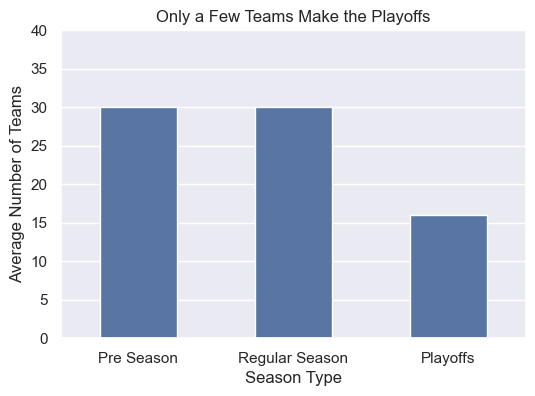

In [35]:
# visualization for introduction
unique_teams = games_recent_5yrs.groupby(['season_id', 'season_type'])['team_name_home'].nunique()
avg_unique_teams = unique_teams.groupby('season_type').mean()
season_order = ['Pre Season', 'Regular Season', 'Playoffs']
avg_unique_teams = avg_unique_teams.reindex(season_order)
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_unique_teams.index, y=avg_unique_teams.values, width=0.5)
plt.title('Only a Few Teams Make the Playoffs')
plt.xlabel('Season Type')
plt.ylabel('Average Number of Teams')
plt.ylim(0,40)
plt.show()

Rising action
Our analysis revealed interesting patterns in playoff participation. Five teams - the Brooklyn Nets, Denver Nuggets, Philadelphia 76ers, Milwaukee Bucks, and Boston Celtics - achieved a perfect record, making the playoffs in all five seasons. This consistent postseason presence suggests strong organizational stability and reliable performance.
However, playoff appearances alone don't tell the complete story. To truly understand a team's postseason success and potential investment value, we needed to examine how deep these teams went in the playoffs. This meant looking at the total number of playoff games played, which indicates both consistency and championship potential.


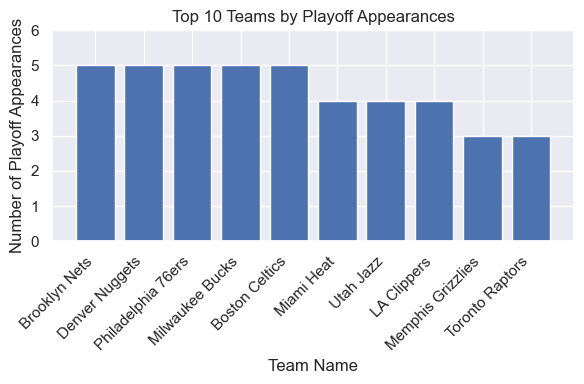

In [36]:
playoff_top_teams = playoff_all.head(10)
plt.figure(figsize=(6, 4))
plt.bar(playoff_top_teams['team_name'], playoff_top_teams['seasons'])
plt.title('Top 10 Teams by Playoff Appearances')
plt.xlabel('Team Name')
plt.ylabel('Number of Playoff Appearances')
plt.ylim(0,6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Climax
During 2019-2023, the Boston Celtics led all teams with 75 playoff games, followed by the Denver Nuggets (68 games) and Miami Heat (66 games). Both the Boston Celtics and Denver Nuggets maintained perfect playoff attendance while achieving high win rates (54.7% and 54.4% respectively), demonstrating consistent excellence. 
The Golden State Warriors’ performance is particularly impressive, reaching 57 games in just 3 playoff appearances (19 average games per season) and the highest win percentage (63%), suggesting they went deep in every playoff they were present.  The Milwaukee Bucks round out the top performers with 65 games and the win percentage (60%) among frequent playoff teams. These metrics showcase why these teams stand out as the NBA's most reliable playoff performers, making them particularly attractive from both competitive and investment perspectives.


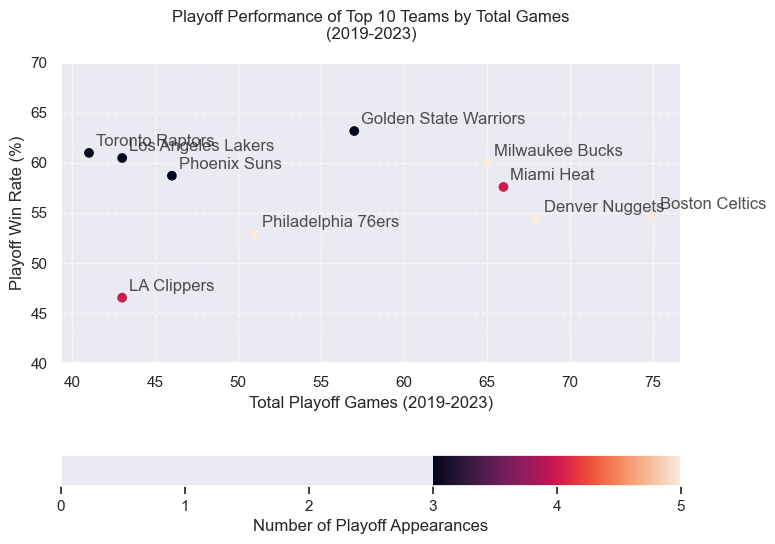

In [40]:
# total playoff games (games)
playoff_home_games = playoff_games[['team_name_home', 'game_id']].rename(
   columns={'team_name_home': 'team_name'})
playoff_away_games = playoff_games[['team_name_away', 'game_id']].rename(
   columns={'team_name_away': 'team_name'})
all_playoff_games = pd.concat([playoff_home_games, playoff_away_games])
playoff_games_count = all_playoff_games.groupby('team_name').size()

# playoff appearances, for both seasons & games
playoff_all = pd.DataFrame({
    'team_name': playoff_appearances.index,
    'seasons': playoff_appearances.values,
    'total_games': playoff_games_count[playoff_appearances.index].values
})

# playoff appearance rate
total_seasons = games_recent_5yrs['season_id'].nunique()
playoff_all['appearance_rate'] = (playoff_all['seasons'] / total_seasons * 100)

# playoff win percentage
home_wins = playoff_games[playoff_games['wl_home'] == 'W'][['team_name_home', 'game_id']].rename(
   columns={'team_name_home': 'team_name'})
away_wins = playoff_games[playoff_games['wl_away'] == 'W'][['team_name_away', 'game_id']].rename(
   columns={'team_name_away': 'team_name'})
all_wins = pd.concat([home_wins, away_wins])
playoff_wins_count = all_wins.groupby('team_name').size()

playoff_all['win_percentage'] = (playoff_wins_count.reindex(playoff_all['team_name']).fillna(0).values / playoff_all['total_games'] * 100)

# average playoff game per season 
playoff_all['games_per_season'] = (playoff_all['total_games'] / playoff_all['seasons'])

top_10_teams_q3 = playoff_all.nlargest(10, 'total_games')
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(top_10_teams_q3['total_games'], top_10_teams_q3['win_percentage'],
          c=top_10_teams_q3['seasons'])
for idx, row in top_10_teams_q3.iterrows():
    ax.annotate(row['team_name'],
                xy=(row['total_games'], row['win_percentage']),
                xytext=(5, 5),
                textcoords='offset points',
                alpha=0.8)
plt.xlabel('Total Playoff Games (2019-2023)')
plt.ylabel('Playoff Win Rate (%)')
plt.title('Playoff Performance of Top 10 Teams by Total Games\n(2019-2023)', y=1.05)
plt.ylim(40,70)
plt.grid(True, linestyle='--', alpha=0.7)
cbar = plt.colorbar(scatter, orientation='horizontal', 
                  label='Number of Playoff Appearances',
                  pad=0.2)
cbar.set_ticks(range(6))
plt.show()


Falling action
On the opposite end of the spectrum, eight teams struggled with playoff consistency, making only one appearance in five years. These included established franchises like the Chicago Bulls (5 games) and Detroit Pistons (4 games). This stark contrast in performance highlights the significant gap between the league's most and least successful teams in terms of postseason achievement.
The data also reveals that historical prestige doesn't guarantee current success, even teams with rich playoff histories can face extended periods of postseason struggles.


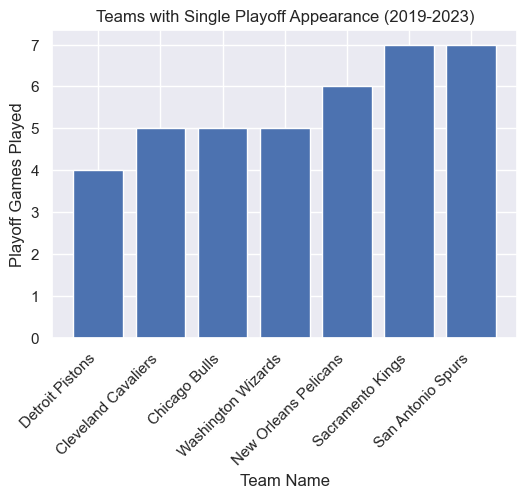

In [41]:
# visualization for falling action
plt.figure(figsize=(6, 4))
playoffs_struggling_teams = playoff_all[playoff_all['seasons'] == 1].sort_values('total_games')
bars = plt.bar(playoffs_struggling_teams['team_name'], playoffs_struggling_teams['total_games'])
plt.title('Teams with Single Playoff Appearance (2019-2023)')
plt.xlabel('Team Name')
plt.ylabel('Playoff Games Played')
plt.xticks(rotation=45, ha='right')
plt.show()


Based on our analysis, here are the key investment recommendations:
Premier Investments (Boston Celtics, Denver Nuggets): Highest playoff game count with perfect attendance, Consistent win rates above 54%, Most reliable returns through consistent playoff success
High-Efficiency Plays (Golden State Warriors, Miami Heat): Exceptional playoff performance when qualifying, League-leading win percentages (63% and 57.5%), Strong potential for deep playoff runs despite fewer appearances
Stable Value (Milwaukee Bucks, Philadelphia 76ers): Consistent playoff presence, Solid win percentages (60% and 52.9%), Demonstrated potential to advance in postseason
The Boston Celtics and Denver Nuggets stand out as the most attractive investment options, combining reliable playoff qualification with consistent deep runs. The Golden State Warriors' exceptional efficiency metrics suggest particularly strong returns during playoff years, though with slightly higher volatility due to fewer appearances.


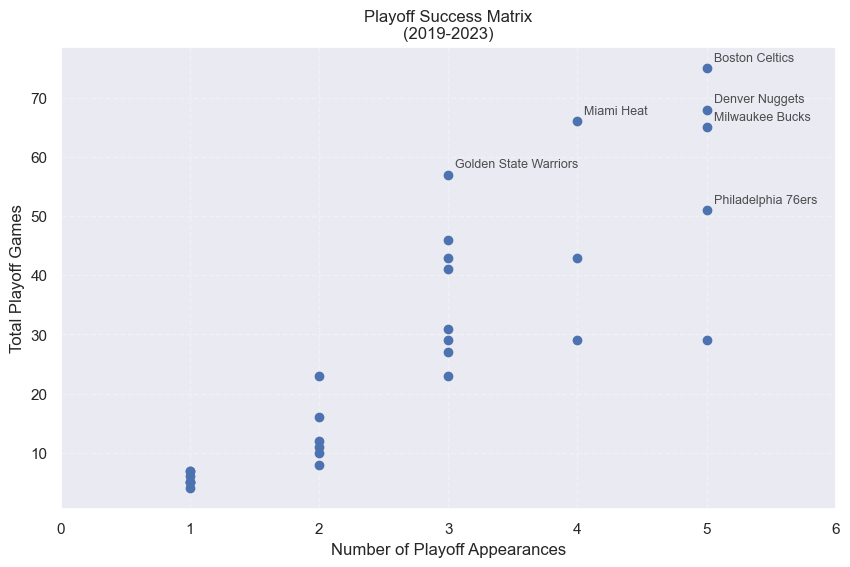

In [42]:
# visualization for resolution
plt.figure(figsize=(10, 6))
plt.scatter(playoff_all['seasons'], playoff_all['total_games'])
teams_of_interest_q3 = ['Boston Celtics', 'Denver Nuggets', 'Golden State Warriors', 
                    'Miami Heat', 'Milwaukee Bucks', 'Philadelphia 76ers']
for idx, row in playoff_all[playoff_all['team_name'].isin(teams_of_interest_q3)].iterrows():
   plt.annotate(row['team_name'],
               xy=(row['seasons'], row['total_games']),
               xytext=(5, 5),
               textcoords='offset points',
               fontsize=9,
               alpha=0.8)
plt.xlabel('Number of Playoff Appearances')
plt.ylabel('Total Playoff Games')
plt.xlim(0,6)
plt.title('Playoff Success Matrix\n(2019-2023)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Q4: Which teams have shown the greatest improvement over the past five years?

In [44]:
#Question 4: Which teams have shown the greatest improvement over the past five years?
# extract year from game_date
games_recent_5yrs['game_year'] = pd.to_datetime(games_recent_5yrs['game_date']).dt.year

# limit to regular season
regular_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Regular Season']

# home and away game data 
reg_home_games = regular_games[['team_name_home', 'game_year', 'pts_home']].rename(
    columns={'team_name_home': 'team_name', 'pts_home': 'points'})
reg_away_games = regular_games[['team_name_away', 'game_year', 'pts_away']].rename(
    columns={'team_name_away': 'team_name', 'pts_away': 'points'})
reg_all_games = pd.concat([reg_home_games, reg_away_games])

# average points for each team by year
team_year_avg = reg_all_games.groupby(['team_name', 'game_year'])['points'].mean().reset_index()

# improvement
improvement_list = []

for team in team_year_avg['team_name'].unique():
    team_data = team_year_avg[team_year_avg['team_name'] == team].sort_values('game_year')
    
    total_improvement = team_data['points'].diff().sum() 
    
    improvement_list.append({
        'team_name_home': team, 
        'total_improvement': total_improvement
    })

team_improvement = pd.DataFrame(improvement_list)
team_improvement = team_improvement.sort_values(by='total_improvement', ascending=False)

print("Teams with the greatest improvement over the past five years:")
print(team_improvement.head(20))

Teams with the greatest improvement over the past five years:
            team_name_home  total_improvement
19         New York Knicks          14.695726
25        Sacramento Kings          12.650000
14       Memphis Grizzlies          10.526330
0            Atlanta Hawks           9.028261
11          Indiana Pacers           8.326020
9    Golden State Warriors           7.655134
5      Cleveland Cavaliers           7.627350
13      Los Angeles Lakers           6.813824
20   Oklahoma City Thunder           6.298844
21           Orlando Magic           5.524613
7           Denver Nuggets           5.377463
4            Chicago Bulls           5.149422
1           Boston Celtics           4.875494
28               Utah Jazz           4.740310
22      Philadelphia 76ers           4.458629
6         Dallas Mavericks           4.343460
3        Charlotte Hornets           4.276423
17  Minnesota Timberwolves           4.053968
12             LA Clippers           2.143659
15              Mi

Introduction
A team's ability to improve year after year can be used to predict their future potential. Our previous data has discussed which teams have done 'best' historically, this doesn’t take into consideration which teams may surprise us in the upcoming season . We analyzed scoring patterns from 2019-2023 to identify teams showing the strongest upward trajectories.

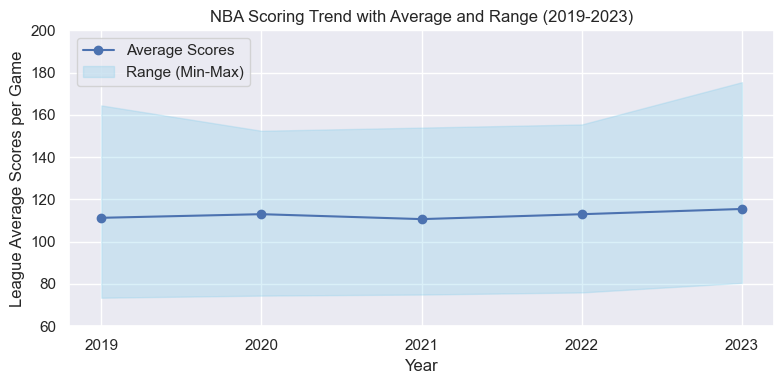

In [45]:
# visualization for introduction
plt.figure(figsize=(8,4))
yearly_stats = regular_games.groupby('game_year').agg({
    'pts_home' : ['mean', 'min', 'max'],
    'pts_away' : ['mean', 'min', 'max']
}).reset_index()
yearly_stats.columns = ['game_year', 'mean_home', 'min_home', 'max_home', 'mean_away', 'min_away', 'max_away']
yearly_stats['points_mean'] = (yearly_stats['mean_home'] + yearly_stats['mean_away']) / 2
yearly_stats['points_min'] = (yearly_stats['min_home'] + yearly_stats['min_away']) / 2
yearly_stats['points_max'] = (yearly_stats['max_home'] + yearly_stats['max_away']) / 2
yearly_avg['game_year'] = yearly_avg['game_year'].astype(int)
plt.plot(yearly_stats['game_year'], yearly_stats['points_mean'], marker='o', label='Average Scores')
plt.fill_between(yearly_stats['game_year'], 
                 yearly_stats['points_min'], 
                 yearly_stats['points_max'], 
                 color='skyblue', alpha=0.3, label='Range (Min-Max)')
plt.xticks(yearly_avg['game_year'])
plt.title('NBA Scoring Trend with Average and Range (2019-2023)')
plt.xlabel('Year')
plt.ylabel('League Average Scores per Game')
plt.ylim(60,200)
plt.legend()
plt.tight_layout()
plt.show()


Rising action
Looking at regular season games, we discovered interesting patterns in scoring trends. According to the boxplot, the median score has shown a gradual increase from 2019 to 2023. Moreover, the lower end of the box, representing the 25th percentile, indicates that the scoring of the bottom 25% of teams has also risen steadily over the years.


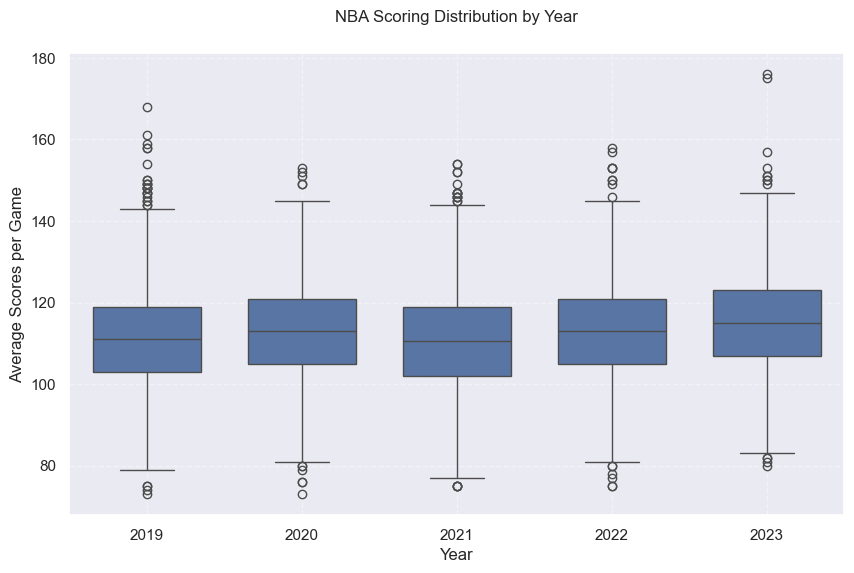

In [46]:
# visualization for rising action
plt.figure(figsize=(10, 6))
sns.boxplot(data=reg_all_games, x='game_year', y='points', width=0.7)
plt.title('NBA Scoring Distribution by Year', y=1.05)
plt.xlabel('Year')
plt.ylabel('Average Scores per Game')
plt.grid(True, linestyle='--', alpha=0.4)


Climax
Looking at the data, we uncovered remarkable developments in several NBA teams' scoring capabilities, both positive and negative. The New York Knicks indicated the most improvement with a 14.7-point increase in points-per-game. This was followed by Sacramento Kings and Memphis Grizzlies. In contrast, The Houston Rockets have indicated a decrease in point potential within the past 5 years.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'New York Knicks'),
  Text(1, 0, 'Sacramento Kings'),
  Text(2, 0, 'Memphis Grizzlies'),
  Text(3, 0, 'Atlanta Hawks'),
  Text(4, 0, 'Indiana Pacers'),
  Text(5, 0, 'Golden State Warriors'),
  Text(6, 0, 'Cleveland Cavaliers'),
  Text(7, 0, 'Los Angeles Lakers'),
  Text(8, 0, 'Oklahoma City Thunder'),
  Text(9, 0, 'Orlando Magic'),
  Text(10, 0, 'Denver Nuggets'),
  Text(11, 0, 'Chicago Bulls'),
  Text(12, 0, 'Boston Celtics'),
  Text(13, 0, 'Utah Jazz'),
  Text(14, 0, 'Philadelphia 76ers'),
  Text(15, 0, 'Dallas Mavericks'),
  Text(16, 0, 'Charlotte Hornets'),
  Text(17, 0, 'Minnesota Timberwolves'),
  Text(18, 0, 'LA Clippers'),
  Text(19, 0, 'Miami Heat'),
  Text(20, 0, 'Detroit Pistons'),
  Text(21, 0, 'San Antonio Spurs'),
  Text(22, 0, 'Phoenix Suns'),
  Text(23, 0, 'Milwaukee Bucks'),
  Text(24, 0,

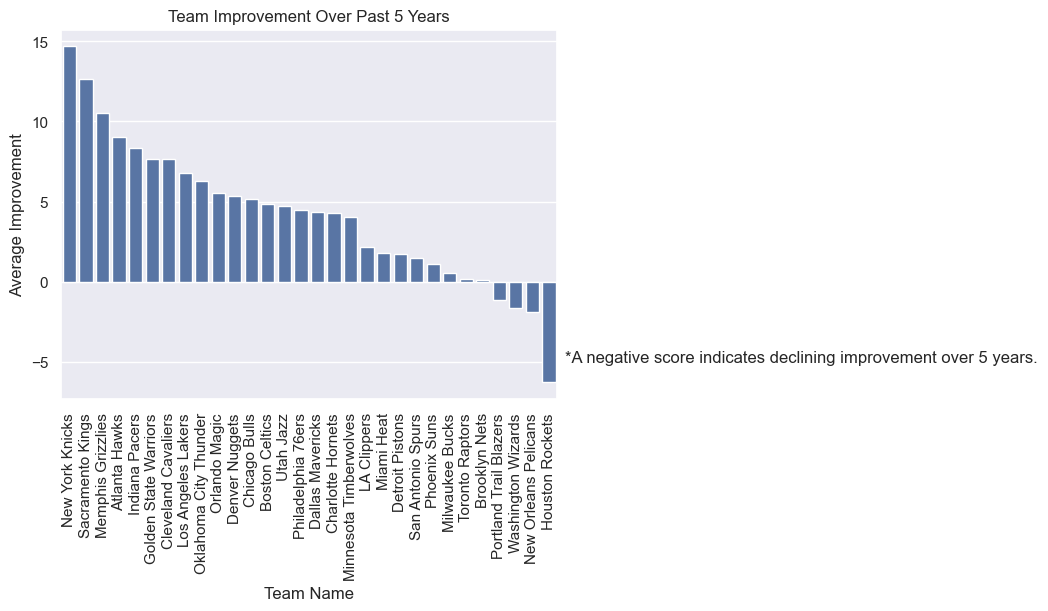

In [47]:
ax2= sns.barplot(x='team_name_home', y='total_improvement', data=team_improvement)
ax2.set_title('Team Improvement Over Past 5 Years')
plt.text(30, -5, '*A negative score indicates declining improvement over 5 years.', fontsize=12)
ax2.set_ylabel('Average Improvement')
ax2.set_xlabel('Team Name')
plt.xticks(rotation=90)


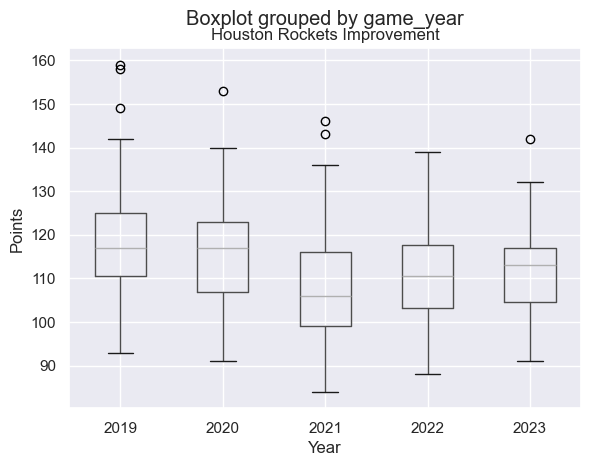

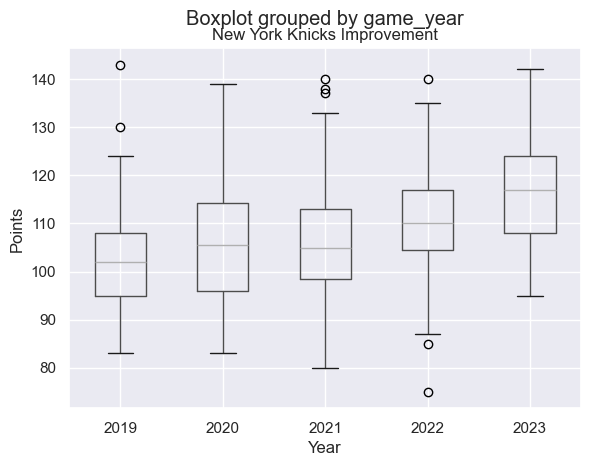

In [48]:
hr_improve = reg_all_games[reg_all_games['team_name'] == 'Houston Rockets']
hr_improve.boxplot(column='points', by='game_year')
plt.title('Houston Rockets Improvement')
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

nyk_improve = reg_all_games[reg_all_games['team_name'] == 'New York Knicks']
nyk_improve.boxplot(column='points', by='game_year')
plt.title('New York Knicks Improvement')
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()


Falling action
What this data is aiming to explain is a team’s ability to strategize and improve. Rather than showing gradual, year-over-year progress, both the New York Knicks and Sacramento Kings displayed sharp inflection points in their scoring output. Their leap from a bottom-tier offensive team to leading the league in improvement showcased successful strategic shifts that could rapidly alter a team's performance ceiling.

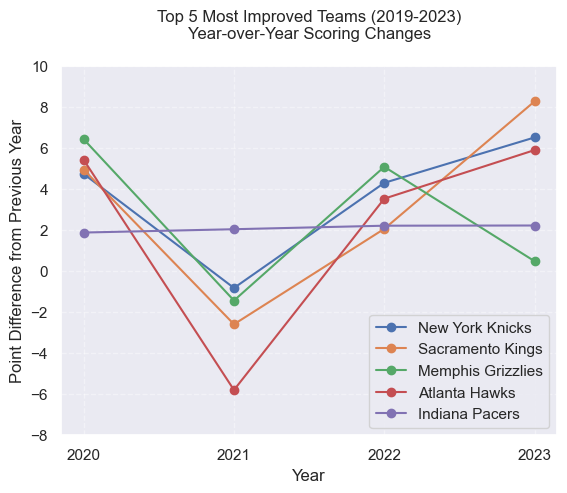

In [49]:
# extract year from game_date
games_recent_5yrs['game_year'] = pd.to_datetime(games_recent_5yrs['game_date']).dt.year
# limit to regular season
regular_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Regular Season']
# home and away game data 
reg_home_games = regular_games[['team_name_home', 'game_year', 'pts_home']].rename(
    columns={'team_name_home': 'team_name', 'pts_home': 'points'})
reg_away_games = regular_games[['team_name_away', 'game_year', 'pts_away']].rename(
    columns={'team_name_away': 'team_name', 'pts_away': 'points'})
reg_all_games = pd.concat([reg_home_games, reg_away_games])
# average points for each team by year
team_year_avg = reg_all_games.groupby(['team_name', 'game_year'])['points'].mean().reset_index()
# improvement
improvement_list = []
for team in team_year_avg['team_name'].unique():
    team_data = team_year_avg[team_year_avg['team_name'] == team].sort_values('game_year')
    
    total_improvement = team_data['points'].diff().sum() 
    
    improvement_list.append({
        'team_name': team, 
        'total_improvement': total_improvement
    })
team_improvement = pd.DataFrame(improvement_list)
team_improvement = team_improvement.sort_values(by='total_improvement', ascending=False)

# visualization for falling action - yoy scoring changes
top_5_q4 = team_improvement.sort_values(by='total_improvement', ascending=False)
top_5_q4 = team_improvement.head(5)['team_name']
for team in top_5_q4:
    team_data = team_year_avg[team_year_avg['team_name']==team]
    team_data = team_data.sort_values('game_year')
    changes = team_data['points'].diff()
    plt.plot(team_data['game_year'][1:], changes[1:], marker='o', label=team)
plt.title('Top 5 Most Improved Teams (2019-2023)\nYear-over-Year Scoring Changes', y=1.05)
plt.xlabel('Year')
plt.ylabel('Point Difference from Previous Year')
plt.xticks([2020, 2021, 2022, 2023])
plt.ylim(-8,10)
plt.legend(loc='lower right')
plt.grid(linestyle='--', alpha=0.4)
plt.show()


Resolution
Teams who haven’t shown much improvement or have even decreased their scoring ability may still be historical winners. Improvements highlight teams that have successfully modernized their approach – teams that can be winners in the future. The New York Knicks and Sacramento Kings, in particular, have demonstrated the ability to significantly enhance their scoring output, suggesting potential for continued growth and value appreciation.


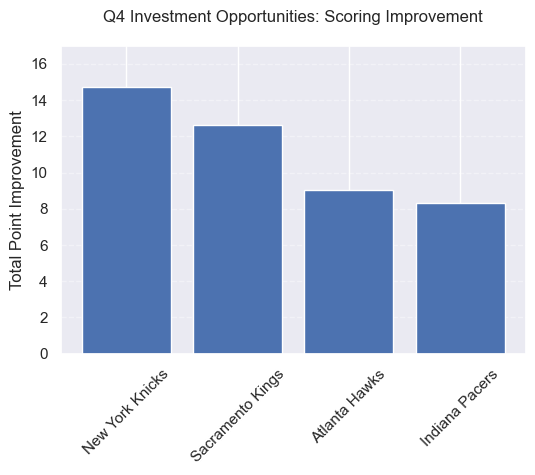

In [50]:
# visualization for resolution
teams_of_interest_q4 = ['New York Knicks', 'Sacramento Kings', 'Atlanta Hawks', 'Indiana Pacers']
team_data_q4 = team_improvement[team_improvement['team_name'].isin(teams_of_interest_q4)]
plt.figure(figsize=(6, 4))
plt.bar(team_data_q4['team_name'], team_data_q4['total_improvement'])
plt.title('Q4 Investment Opportunities: Scoring Improvement', y=1.05)
plt.ylabel('Total Point Improvement')
plt.xticks(rotation=45)
plt.ylim(0,17)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


5. Which teams have demonstrated the best defensive metrics (e.g., blocks and steals), and how has this impacted their winning consistency?

In [51]:
import pandas as pd
import sqlite3 
con = sqlite3.connect("data/nba.sqlite")
games_recent_5yrs = pd.read_sql_query("""
	SELECT * FROM game 
	WHERE season_type NOT IN ('All Star', 'All-Star') 
	AND game_date BETWEEN '2019-01-01 00:00:00' AND '2023-12-31 23:59:59'
    ORDER BY game_date DESC
""", con)

regular_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Regular Season']

# home games stats
home_defense = regular_games[['team_name_home', 'blk_home', 'stl_home', 'wl_home']].rename(
   columns={'team_name_home': 'team_name', 
           'blk_home': 'blocks',
           'stl_home': 'steals',
           'wl_home': 'win_loss'})

# away games stats
away_defense = regular_games[['team_name_away', 'blk_away', 'stl_away', 'wl_away']].rename(
   columns={'team_name_away': 'team_name',
           'blk_away': 'blocks', 
           'stl_away': 'steals',
           'wl_away': 'win_loss'})

# defense metrics
all_defense = pd.concat([home_defense, away_defense])
defense_stats = all_defense.groupby('team_name').agg(
    avg_blocks=('blocks', 'mean'),
    avg_steals=('steals', 'mean')
).reset_index()

# win rate 
wins = all_defense[all_defense['win_loss'] == 'W'].groupby('team_name').size()
total_games = all_defense.groupby('team_name').size()
win_rates = (wins / total_games).reset_index(name='win_rate')

# defense rating
defense_analysis = pd.merge(defense_stats, win_rates, on='team_name')
defense_analysis['defense_rating'] = defense_analysis['avg_blocks'] + defense_analysis['avg_steals']
defense_sorted = defense_analysis.sort_values(
   by=['defense_rating', 'win_rate'], 
   ascending=[False, False]
)

print("Teams with the best defensive metrics:")
print(defense_sorted.head(10))

Teams with the best defensive metrics:
                 team_name  avg_blocks  avg_steals  win_rate  defense_rating
14       Memphis Grizzlies    5.619718    8.653521  0.546479       14.273239
27         Toronto Raptors    5.036932    8.914773  0.568182       13.951705
17  Minnesota Timberwolves    5.397101    8.423188  0.431884       13.820290
22      Philadelphia 76ers    5.336158    8.050847  0.635593       13.387006
11          Indiana Pacers    5.576271    7.731638  0.457627       13.307910
1           Boston Celtics    5.485876    7.502825  0.621469       12.988701
13      Los Angeles Lakers    5.355114    7.508523  0.528409       12.863636
9    Golden State Warriors    4.713043    8.043478  0.530435       12.756522
10         Houston Rockets    4.810734    7.892655  0.381356       12.703390
23            Phoenix Suns    4.628895    7.824363  0.577904       12.453258


Introduction
In the NBA, defensive prowess is often the foundation for championship success. To uncover the impact of defense on team performance, we analyzed key defensive metrics-blocks and steals- from 2019 to 2023. Our goal was to identify teams that not only excel defensively but also maintain consistent winning records. While offensive statistics often dominate headlines, our analysis reveals the role defense plays in driving victories. These insights provide a data-driven perspective, aiding more informed decisions about team valuation and investment strategies.


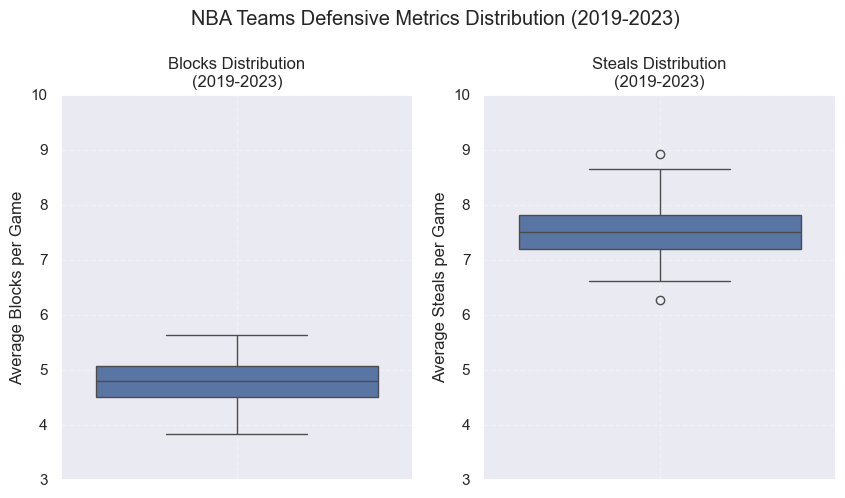

In [52]:
# visualization for introduction - league-wide defense distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('NBA Teams'' Defensive Metrics Distribution (2019-2023)', y=1.05)
# blocks
sns.boxplot(data=defense_analysis, y='avg_blocks', ax=ax1)
ax1.set_title('Blocks Distribution\n(2019-2023)')
ax1.set_ylabel('Average Blocks per Game')
ax1.set_ylim(3,10)
plt.sca(ax1)
plt.grid(True, linestyle='--', alpha=0.3)
# steals
sns.boxplot(data=defense_analysis, y='avg_steals', ax=ax2)
ax2.set_title('Steals Distribution\n(2019-2023)')
ax2.set_ylabel('Average Steals per Game')
ax2.set_ylim(3,10)
plt.sca(ax2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Rising action
Our analysis uncovered compelling defensive patterns across NBA teams. The Memphis Grizzlies demonstrated exceptional defensive metrics, leading with 5.62 blocks and 8.65 steals per game, while the Toronto Raptors excelled specifically in steals with 8.91 per game. These metrics stand out historically, but they raise critical investment questions.
To truly understand the investment potential, we needed to look beyond raw defensive statistics. How well do these defensive metrics translate to actual team success? Are teams with elite defensive numbers consistently outperforming the market? By examining the correlation between defensive prowess and winning percentage, we aim to identify teams that combine defensive excellence with proven success - a potential indicator of sustainable long-term value.


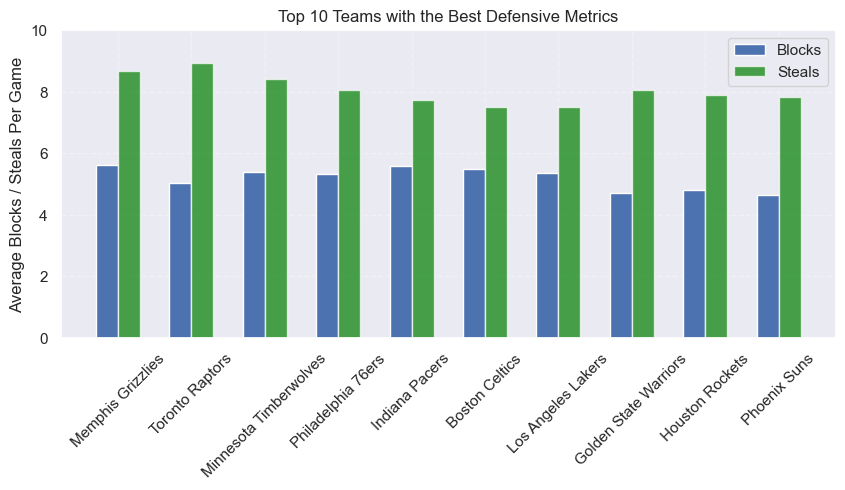

In [53]:
# visualization for rising action
top_10_defense = defense_sorted.sort_values('defense_rating', ascending=False).head(10)
plt.figure(figsize=(10, 4))
# grouped bar chart
x = range(len(top_10_defense['team_name']))
width = 0.3
plt.bar(x, top_10_defense['avg_blocks'], width, label='Blocks')
plt.bar([i + width for i in x], top_10_defense['avg_steals'], width, label='Steals', color='green', alpha=0.7)
plt.ylabel('Average Blocks / Steals Per Game')
plt.title('Top 10 Teams with the Best Defensive Metrics')
plt.xticks([i + width/2 for i in x], top_10_defense['team_name'], rotation=45)
plt.ylim(0,10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Climax 1
The data reveals a compelling investment story through defensive metrics and winning consistency. The Milwaukee Bucks emerge as the top performer with a league-leading 69.1% win rate while maintaining solid defensive numbers (5.0 blocks, 7.4 steals). Following closely, the Philadelphia 76ers demonstrate exceptional defensive capabilities with 5.3 blocks and 8.1 steals, translating to a 63.6% win rate. The Denver Nuggets and Boston Celtics round out the top tier, each converting strong defensive metrics into win rates above 62%.
Particularly noteworthy is that while teams like the Toronto Raptors show superior defensive statistics (ranking highest in total defense rating at 13.95), their lower win rate (56.8%) suggests challenges in converting defensive excellence into consistent victories.
This pattern indicates that for investment purposes, teams successfully balancing defensive capabilities with winning consistency, like the Bucks and 76ers, represent more stable investment opportunities.


Text(0.5, 1.05, 'Defensive Performance and Win Rate by Team')

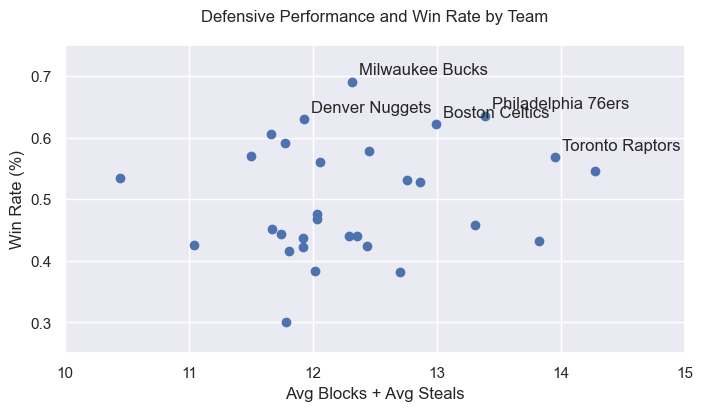

In [54]:
# visualization for climax 1
plt.figure(figsize=(8, 4))
plt.scatter(defense_sorted['defense_rating'], 
           defense_sorted['win_rate'])

key_teams = ['Milwaukee Bucks', 'Philadelphia 76ers', 'Denver Nuggets', 
            'Boston Celtics', 'Toronto Raptors']
for _, team in defense_sorted[defense_sorted['team_name'].isin(key_teams)].iterrows():
    plt.annotate(team['team_name'], 
                (team['defense_rating'], team['win_rate']),
                xytext=(5, 5), 
                textcoords='offset points')
plt.ylim(0.25,0.75)
plt.xlim(10,15)
plt.xlabel('Avg Blocks + Avg Steals')
plt.ylabel('Win Rate (%)')
plt.title('Defensive Performance and Win Rate by Team', y=1.05)


Climax 2
Analysis reveals surprisingly weak correlations between defensive metrics and winning performance, with blocks (0.223), steals (0.061), and overall defense rating (0.167) showing minimal correlation with win rates. The scatter plots visualize this disconnect clearly - teams with high defensive ratings frequently fail to achieve corresponding win rates.
These findings challenge conventional wisdom about defensive metrics as team performance indicators. For instance, while the Toronto Raptors excel in defensive statistics, their lower win rate demonstrates that defensive prowess alone doesn't guarantee success. The scattered distribution across all metrics suggests investors need a more comprehensive evaluation framework beyond defensive capabilities to assess team potential.


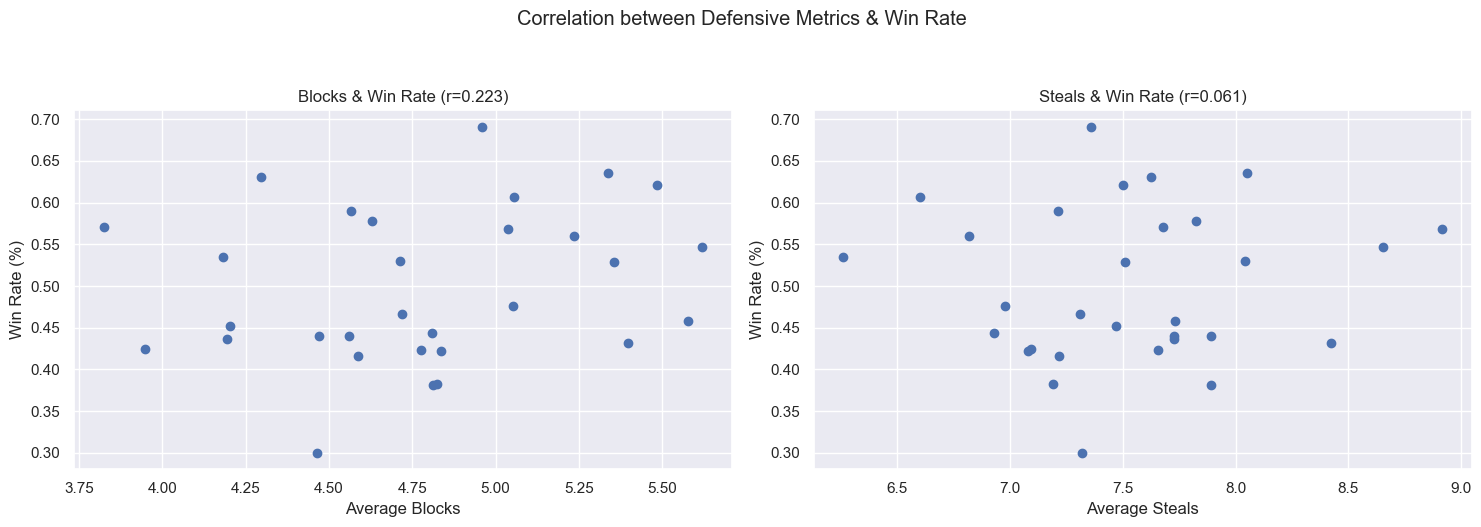

In [55]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(defense_analysis['avg_blocks'], defense_analysis['win_rate'])
ax1.set_title('Blocks & Win Rate (r=0.223)')
ax1.set_xlabel('Average Blocks')
ax1.set_ylabel('Win Rate (%)')
ax2.scatter(defense_analysis['avg_steals'], defense_analysis['win_rate'])
ax2.set_title('Steals & Win Rate (r=0.061)')
ax2.set_xlabel('Average Steals')
ax2.set_ylabel('Win Rate (%)')
plt.suptitle('Correlation between Defensive Metrics & Win Rate', y=1.05)
plt.tight_layout()
plt.show()


Falling Action
The disconnect between defensive metrics and win rates has significant market implications. Valuation heavily weighing defensive statistics may be overvaluing certain teams while missing other investment opportunities. This misalignment creates potential market inefficiencies, particularly in teams like the Milwaukee Bucks and Philadelphia 76ers, who demonstrate success beyond pure defensive excellence. Moreover, teams focusing solely on defensive improvement might be misallocating resources, suggesting a need for a more balanced approach to team development and valuation.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Phoenix Suns'),
  Text(1, 0, 'Boston Celtics'),
  Text(2, 0, 'Philadelphia 76ers'),
  Text(3, 0, 'Golden State Warriors'),
  Text(4, 0, 'Los Angeles Lakers'),
  Text(5, 0, 'Toronto Raptors'),
  Text(6, 0, 'Indiana Pacers'),
  Text(7, 0, 'Houston Rockets'),
  Text(8, 0, 'Memphis Grizzlies'),
  Text(9, 0, 'Minnesota Timberwolves')])

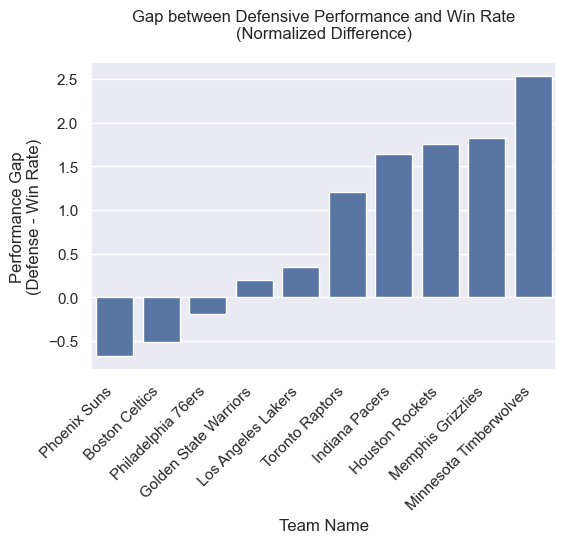

In [59]:
top10_teams_best_defense = ['Memphis Grizzlies','Toronto Raptors','Minnesota Timberwolves','Philadelphia 76ers',\
                            'Indiana Pacers','Boston Celtics','Los Angeles Lakers','Golden State Warriors','Houston Rockets','Phoenix Suns']

# normalization
normalized_defense = (defense_sorted['defense_rating'] - defense_sorted['defense_rating'].mean()) / defense_sorted['defense_rating'].std()
normalized_winrate = (defense_sorted['win_rate'] - defense_sorted['win_rate'].mean()) / defense_sorted['win_rate'].std()
defense_sorted['performance_gap'] = normalized_defense - normalized_winrate
top10_teams_gap = defense_sorted[defense_sorted['team_name'].isin(top10_teams_best_defense)].sort_values('performance_gap')
plt.figure(figsize=(6, 4))
sns.barplot(data=top10_teams_gap,
           x='team_name',
           y='performance_gap')
plt.title('Gap between Defensive Performance and Win Rate\n(Normalized Difference)', y=1.05)
plt.xlabel('Team Name')
plt.ylabel('Performance Gap\n(Defense - Win Rate)')
plt.xticks(rotation=45, ha='right')


Resolution
Based on our analysis, we identify three distinct investment categories:
1. Premium Investments (Milwaukee Bucks, Philadelphia 76ers):
 - Balance of defensive capability and winning consistency
 - Proven ability to convert defensive skills into victories
 - Most stable investment prospects
2. Value Opportunities (Denver Nuggets, Boston Celtics):
 - Strong overall performance metrics
 - Effective translation of defensive capabilities into wins
3. Cautionary Investments (Toronto Raptors, Memphis Grizzlies):
 - Superior defensive statistics but lower win rates
 - Need for additional performance factors beyond defense
 - Higher risk profile despite strong defensive metrics
The Milwaukee Bucks and Philadelphia 76ers stand out as particularly attractive investments, demonstrating the crucial balance between defensive capabilities and consistent winning performance.


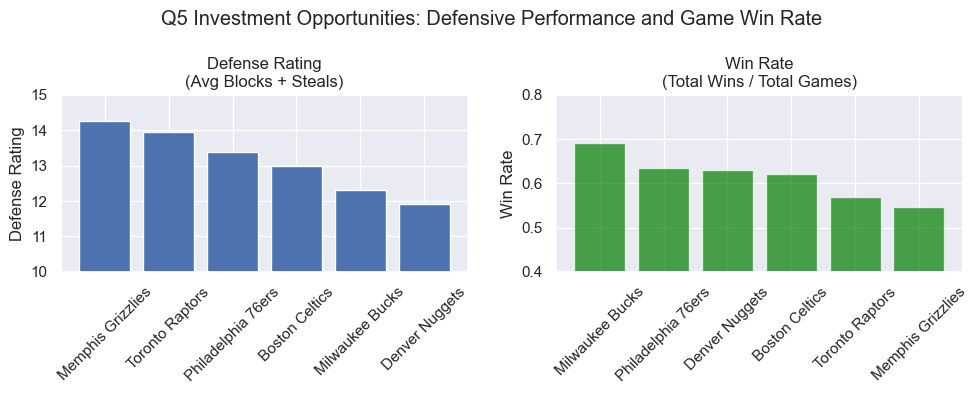

In [60]:
# visualization for resolution 
team_of_interest_q5 = ['Milwaukee Bucks', 'Philadelphia 76ers', 'Denver Nuggets', 'Boston Celtics', 'Toronto Raptors', 'Memphis Grizzlies']
team_data_q5 = defense_sorted[defense_sorted['team_name'].isin(team_of_interest_q5)]
defense_sorted_vis = team_data_q5.sort_values('defense_rating', ascending=False)
winrate_sorted_vis = team_data_q5.sort_values('win_rate', ascending=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# defense rating
ax1.bar(defense_sorted_vis['team_name'], defense_sorted_vis['defense_rating'])
ax1.set_title('Defense Rating\n(Avg Blocks + Steals)')
ax1.set_ylabel('Defense Rating')
ax1.set_ylim(10, 15)
# win rate
ax2.bar(winrate_sorted_vis['team_name'], winrate_sorted_vis['win_rate'], color='green', alpha=0.7)
ax2.set_title('Win Rate\n(Total Wins / Total Games)')
ax2.set_ylabel('Win Rate')
ax2.set_ylim(0.4, 0.8)
plt.sca(ax1)
plt.xticks(rotation=45)
plt.sca(ax2)
plt.xticks(rotation=45)
plt.suptitle('Q5 Investment Opportunities: Defensive Performance and Game Win Rate')
plt.tight_layout()
plt.show()
